# Visualising complex numbers

# Bode plots

Okay, so we can describe systems in the frequency domain with these funky transfer functions, so what? Well, we still have some way to go before we can start doing useful stuff... I told you this was the part where it got messy.

Just to be clear, we have a transfer function $G(s)$ that maps the complex plane to the complex plane, i.e.
$$ G: \mathbb{C} \rightarrow \mathbb{C}.$$
Then we have the steady state output being $Y(s) = G_{yu}(s)U(s)$, so for a given $s$, $Y(s)$ is the product of two complex numbers $G_{yu}(s)$ and $U(s)$. Remember for complex numbers: multiplication means multiplying the modulus/magnitude and adding the argument/angle/phase, i.e. $ae^{ci}\;be^{di} = abe^{(c+d)i}$. Likewise, division is division and subtraction, respectively, i.e. $\frac{ae^{ci}}{be^{di}} = \frac{a}{b}e^{(c-d)i}$. These two rules can be used to combine simple transfer function 'blocks' into more complicated functions. In any case, any input $U(s)$ will be amplified with $|G_{yu}(s)|$ and shifted with $\angle G_{yu}(s)$ to the output $Y(s)$, because they're multiplied.

Now we want to visualise the behaviour of $G$, since that gives us a ton of information on that steady state input-output behaviour of the system. This can be done with *Bode* plots.

**Important: Bode plots use the Fourier transform, so $s=i\omega$ !**

So Bode follows the following rationale: $G$ maps the imaginary axis (pure sinusoids in time domain) to some other curve in the complex plane, not on the imaginary axis per se. Any complex number can be defined through their modulus/magnitude/gain and argument/angle/phase, so plotting these against the oscillation frequency, $\omega$, defines the curve in the complex plane. The gain is usually plotted on a log-log scale and the phase on a lin-log scale. Lets have a look at how that looks like for the simplest functions, $G = s^n$. Also I draw some extra constant magnitude lines in the grid of the complex plane. These constant magnitudes seem weirdly squished, but that's just the symmetric log scale.

<IPython.core.display.Javascript object>

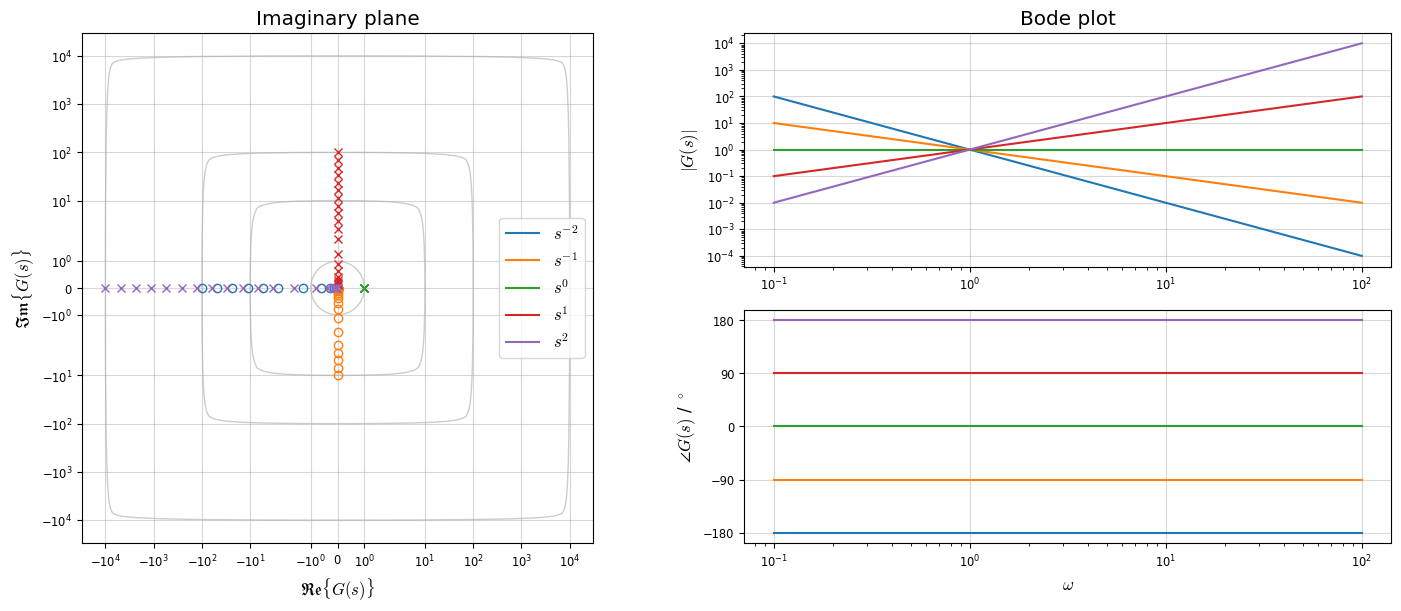

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

from helperFunctions import *
setPlotStyle()

N = range(-2,3)
G1 = [lambda s, n=n : s**n for n in N]
OM = np.logspace(-1, 2, 20)
S = OM*1j
G1_eval = [G(S) for G in G1]

### Plotting ###
fig = plt.figure(num="Bode plot intro")
gs = GridSpec(2,2, figure=fig)
ax = [fig.add_subplot(a) for a in [gs[:, 0], gs[0, 1], gs[1, 1]]]

setGridPolar(ax[0], Mticks=[0, 1, 2, 4], Np=0)
[ax[0].plot(G_eval.real, G_eval.imag, 'x' if n >= 0 else 'o', c='none', mec=f"C{idx}") 
        for G_eval, n, idx in zip(G1_eval, N, range(len(N)))]
hnd = [ax[1].loglog(OM, np.abs(G_eval), label=f"$s^{"{"}{n}{"}"}$")[0] 
       for G_eval, n in zip(G1_eval, N)]
[ax[2].semilogx(OM, np.angle(G_eval, deg=True)) for G_eval in G1_eval]
ax[0].set(title="Imaginary plane", 
          xlabel=r"$\mathfrak{Re}\{G(s)\}$", ylabel=r"$\mathfrak{Im}\{G(s)\}$", 
          xscale='symlog', yscale='symlog',
          aspect='equal')
ax[1].set(title="Bode plot", ylabel = "$|G(s)|$")
ax[2].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[2].yaxis.set_major_locator(MultipleLocator(90))
ax[0].legend(handles=hnd)
display(fig)


What you should note in the plot above:
- In the left plot the magnitude changes, but the phase is constant and how this translates to the Bode plot,
- $s^0=1$ is constant and how that translates to the magnitude plot,
- that in a log-log scale $s^n$, the magnitude is a line with slope $n$.